In [1]:
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord

# Python standard-library
from urllib.parse import urlencode
from urllib.request import urlretrieve

# Third-party dependencies
from astropy import units as u

from IPython.display import Image

from astroquery.sdss import SDSS

from astropy import coordinates as coords

/Users/forero/anaconda3/lib/python3.6/site-packages/astroquery/sdss/__init__.py:29: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


In [2]:
galaxy_name = 'NGC5406'
galaxy = SkyCoord.from_name(galaxy_name)

In [3]:
pos = coords.SkyCoord(galaxy.ra, galaxy.dec, frame='icrs')
print(pos)

<SkyCoord (ICRS): (ra, dec) in deg
    ( 210.08384012,  38.91541833)>


In [10]:
# tell the SDSS service how big of a cutout we want
im_size = 3*u.arcmin # get a 25 arcmin square
im_pixels = 1024
cutoutbaseurl = 'http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx'
query_string = urlencode(dict(ra=galaxy.ra.deg,
                              dec=galaxy.dec.deg,
                              width=im_pixels, height=im_pixels,
                              scale=im_size.to(u.arcsec).value/im_pixels))
url = cutoutbaseurl + '?' + query_string

# this downloads the image to your disk
image_name = galaxy_name+'_SDSS_cutout.jpg'
urlretrieve(url, image_name)

('NGC5406_SDSS_cutout.jpg', <http.client.HTTPMessage at 0x110c0ed68>)

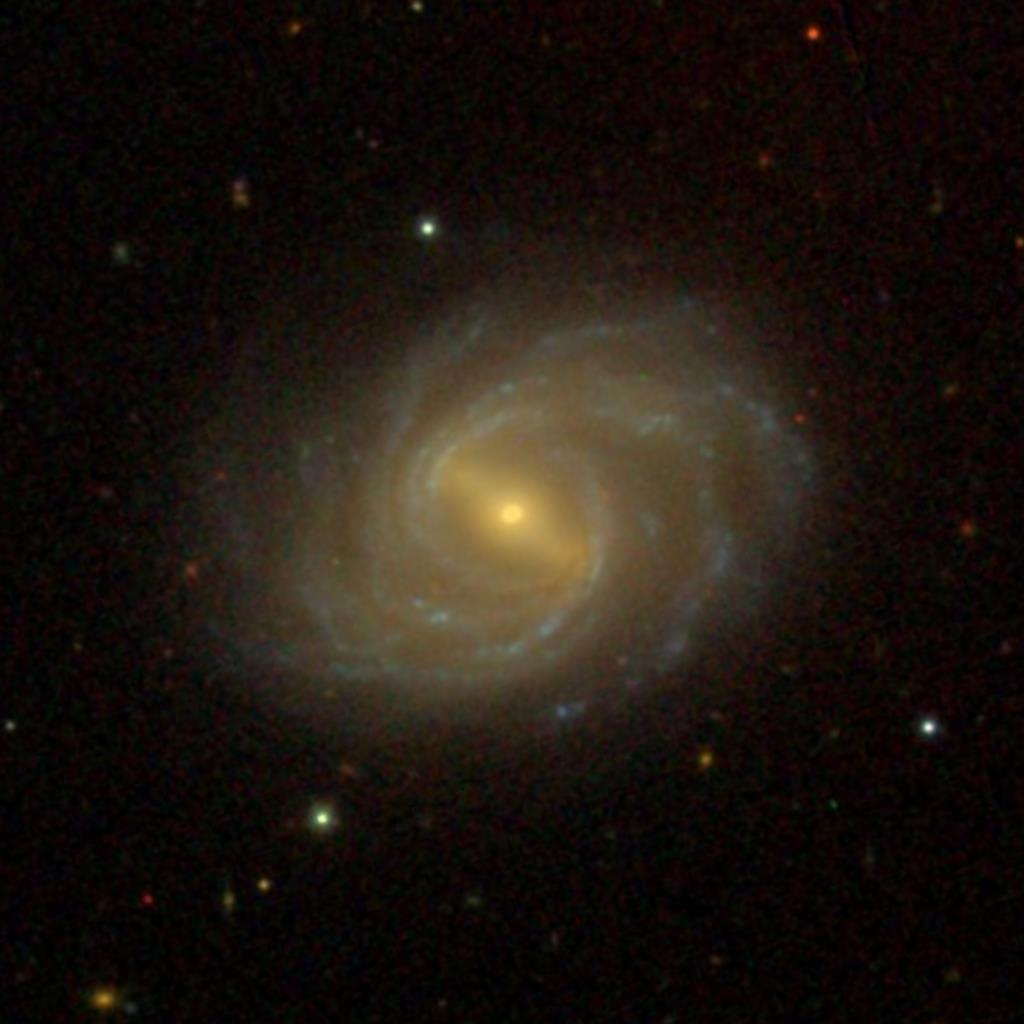

In [11]:
Image(image_name)

In [ ]:
califa_url='ftp://anonymous@ftp.caha.es/CALIFA/reduced/V500/reduced_v2.2/NGC5406.V500.rscube.fits.gz'
urlretrieve(califa_url, 'tmp.fits')

In [88]:
print(xid)

      ra           dec             objid        run  rerun camcol field
------------- ------------- ------------------- ---- ----- ------ -----
190.707611504 2.68777334886 1237651754014998590 1462   301      4   436
190.707622939  2.6877658609 1237651754014998581 1462   301      4   436


In [89]:
im = SDSS.get_images(matches=xid, band='g')

In [103]:
for i in im[1]:
    print(i, np.shape(i))

<astropy.io.fits.hdu.image.PrimaryHDU object at 0x1159a5c50> (1489, 2048)
<astropy.io.fits.hdu.image.ImageHDU object at 0x11cabef98> (2048,)
<astropy.io.fits.hdu.table.BinTableHDU object at 0x11cac36a0> ()
<astropy.io.fits.hdu.table.BinTableHDU object at 0x11cb22048> ()


In [73]:
sp = SDSS.get_spectra(matches=xid)

In [104]:
data =im[1][0].data

In [92]:
import numpy as np

In [105]:
np.shape(data)

(1489, 2048)

In [94]:
import matplotlib 
matplotlib.use('Agg')

import numpy as np
import matplotlib.pyplot as plt # this is the only line required to make plots with matplotlibt

# this line allows you to see the plot inside the notebook
%matplotlib inline 

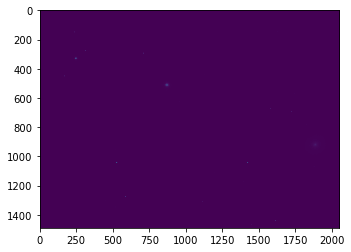

In [107]:
plt.imshow(data)
#.hist(data.flatten())

In [64]:
data.max(), data.min()

(176.75, -0.09118652)

In [87]:
data = sp[0][1].data

In [88]:
np.shape(data)

(3841,)

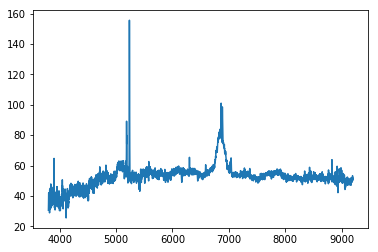

In [95]:
plt.plot(10**data['loglam'], data['flux'])

In [93]:
data['loglam']

array([3.5797, 3.5798, 3.5799, ..., 3.9635, 3.9636, 3.9637], dtype=float32)